# Business Understanding 
## Business problem: 
My company is expanding in to new industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, I am charged to determine anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.I am must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.
## Project objectives: 
### Main objective
To help decide which aircraft to purchase and operate airplanes for commercial and private enterprises.
### Specific objectives
To be visualize make and mode and their risks 
To visualize the type of aircraft category and their risks
To visualize the type of engine and their risks.


# Data Understanding 
## Data collection
[Data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) was collected from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
## Data exploration
Analyzing the data to identify patterns, missing values, and anomalies.
Univariate Analysis
Bivariate Analysis
Multivariate Analysis

In [1]:
#importing libraries for data manipulation (pandas, numpy) and visualization (seaborn, matplotlib)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the maximum number of columns to 40 to display all columns
pd.set_option('display.max_columns', 40)

In [3]:
#load National Transportation Safety Board(ntsb) dataset to ntsb_df
#set encoding to latin1 to handle encoding error
ntsb_df = pd.read_csv('AviationData.csv', encoding='latin1')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#getting top 5 rows
ntsb_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#getting bottom 5 rows
ntsb_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#getting sample 5 rows
ntsb_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#checking data info
ntsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
#describing numerical columns
ntsb_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
#describing numerical columns
ntsb_df.describe(include='O')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,87889,85695,32287,87572,88826,88797,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,109,4,15,79105,8237,12318,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [10]:
ntsb_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [11]:
#Changing columns name by replace . with _ and lowercasing
ntsb_df.columns = ntsb_df.columns.str.lower()
ntsb_df.columns = ntsb_df.columns.str.replace(".","_")
ntsb_df.columns

C:\Users\Mich\AppData\Local\Temp/ipykernel_20728/257064276.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ntsb_df.columns = ntsb_df.columns.str.replace(".","_")


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

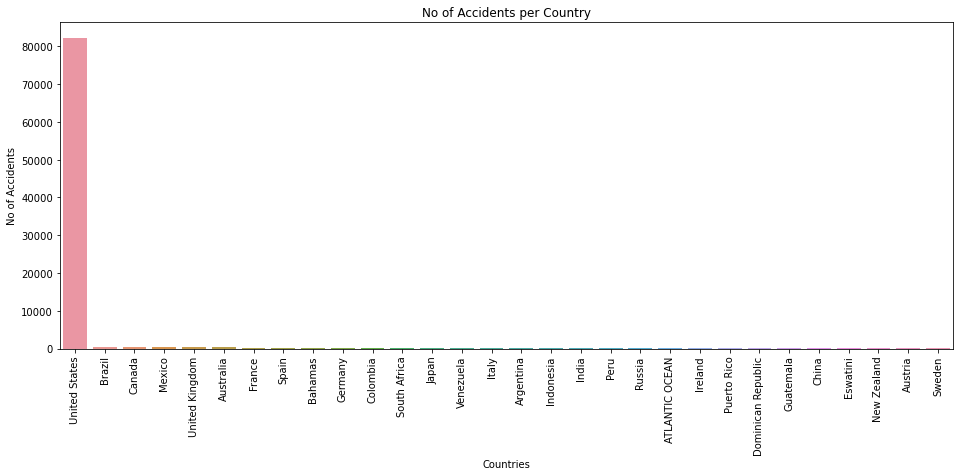

In [12]:
#plotting countries with no of accidents
countries_df = ntsb_df['country'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=countries_df['index'],y=countries_df['country'])
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Country")
plt.show()

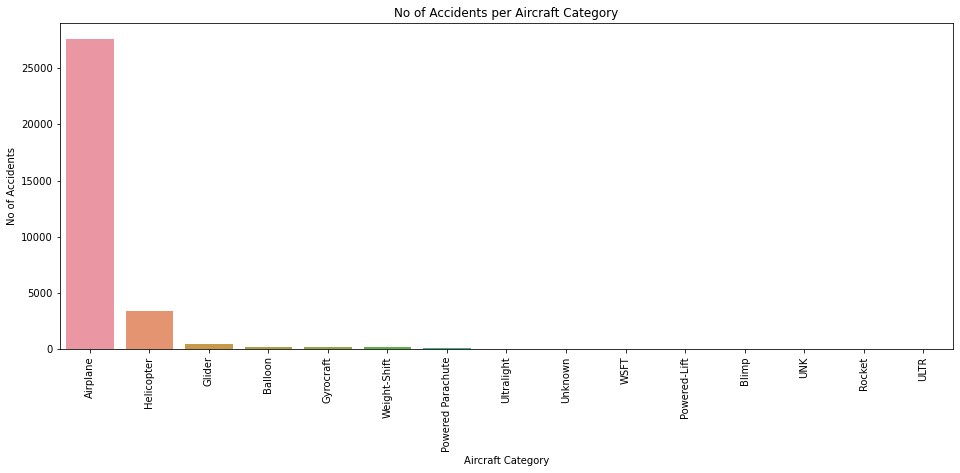

In [13]:
#plotting aircraft category with no of accidents
aircraft_category_df = ntsb_df['aircraft_category'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=aircraft_category_df['index'],y=aircraft_category_df['aircraft_category'])
plt.xlabel('Aircraft Category')
plt.xticks(rotation=90)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Aircraft Category")
plt.show()

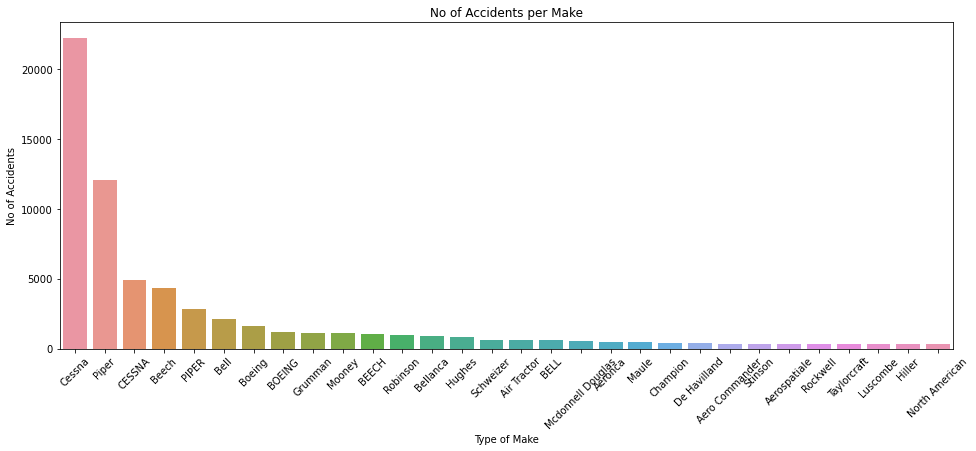

In [14]:
#plotting make with no of accidents
make_df = ntsb_df['make'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=make_df['index'],y=make_df['make'])
plt.xlabel('Type of Make')
plt.xticks(rotation=45)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Make")
plt.show()

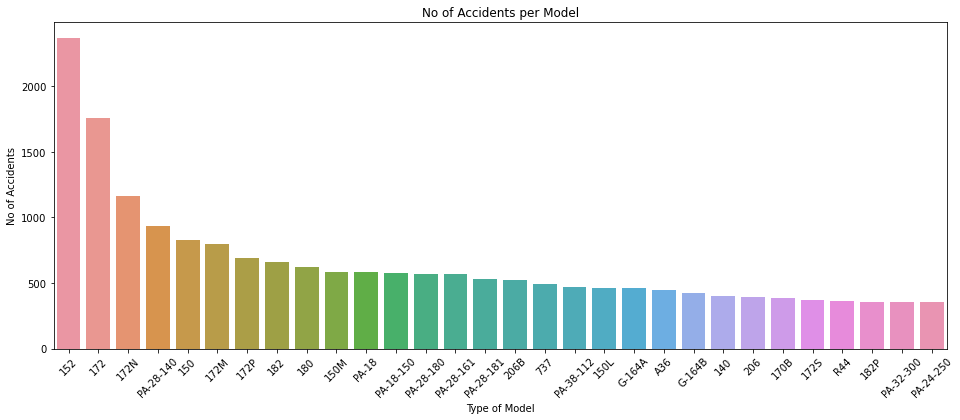

In [15]:
#plotting model with no of accidents
model_df = ntsb_df['model'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=model_df['index'],y=model_df['model'])
plt.xlabel('Type of Model')
plt.xticks(rotation=45)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Model")
plt.show()

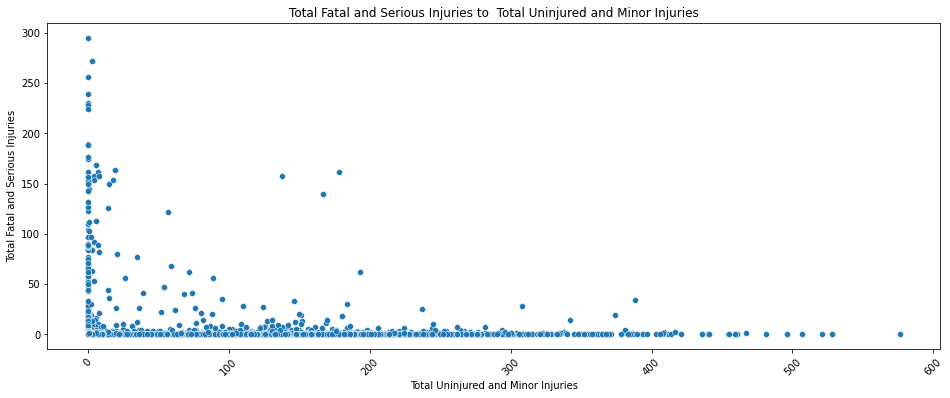

In [16]:
#type of make and country  
plt.figure(figsize=(16,6))
sns.scatterplot(x=ntsb_df['total_uninjured']+ntsb_df['total_minor_injuries'],y=ntsb_df['total_fatal_injuries']+ntsb_df['total_serious_injuries'])
plt.xlabel('Total Uninjured and Minor Injuries')
plt.xticks(rotation=45)
plt.ylabel('Total Fatal and Serious Injuries')
plt.title("Total Fatal and Serious Injuries to  Total Uninjured and Minor Injuries")
plt.show()

# Data Preparation
## Cleaning
Handling missing values, duplicates, or errors in the data.
## Transformation
Normalizing, scaling, or encoding data

## Feature engineering
Creating new variables or features(if any) that better represent the problem.


In [17]:
#checking columns
for col in ntsb_df.columns:
    #unique values and no of unique values
    unique_val = str(ntsb_df[col].unique())
    no_unique_val = str(ntsb_df[col].nunique())
    
    print(col + " | No of unique = "+ no_unique_val +"\n" +unique_val+"\n")

event_id | No of unique = 87951
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']

investigation_type | No of unique = 2
['Accident' 'Incident']

accident_number | No of unique = 88863
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']

event_date | No of unique = 14782
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

location | No of unique = 27758
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

country | No of unique = 219
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' '

publication_date | No of unique = 2924
[nan '19-09-1996' '26-02-2007' ... '22-12-2022' '23-12-2022' '29-12-2022']



In [18]:
#Fixing values which are written in different cases
for col in set(ntsb_df.select_dtypes(include = ['O'])):
    #original values contained within a column
    org_unique_val = set(ntsb_df[col].unique())
    no_org_unique_val = ntsb_df[col].nunique()
    
    if col in ['location','engine_type','make','model','airport_name','air_carrier']:
        ntsb_df[col] = ntsb_df[col].str.title()
    elif col in ['weather_condition','airport_code','longitude','registration_number']:
        ntsb_df[col] = ntsb_df[col].str.upper()
        
    #Values contained within a column after formatting(capitalizing/titling)
    no_fmr_unique_val =  ntsb_df[col].nunique()
    
    #check the value of difference before any computation
    diff = no_org_unique_val - no_fmr_unique_val
    
    if diff > 0:
        fmr_unique_val =  set(ntsb_df[col].unique())
        #difference btw values
        print(col+"\n No of similar values " + str(no_org_unique_val- no_fmr_unique_val))
        #to check the similar values 
        print( "Sample Values\n"+str(list(org_unique_val - fmr_unique_val)[:15]))
    

registration_number
 No of similar values 11
Sample Values
['N738Ej', 'Unk', 'N5929t', 'None', 'N2995v', 'Unknown', 'Unregister', 'none', 'N551w', 'N712j', 'Unreg', 'N9133m', 'Vh-XMO', 'N29cf', 'N5759t']
air_carrier
 No of similar values 382
Sample Values
['WINSHIP KENT S', 'NORTHERN AIR CARGO INC', 'Icarus Air LLC', 'CALL ONE INC', 'SAN JOAQUIN HELICOPTERS INC', 'PARAMAZONIA TAXI AEREO LTDA', '(dba: Trans World Express)', 'SRRAEL CAMPRAS DOS SANTOS', 'WOOLACE JAMES L', 'SACRAMENTO COUNTY SHERIFFS OFFICE', 'JACKO JOEL N', 'INCEPTUS INC.', 'Aero Club of Rimini', 'Air Associates of Kansas', 'FINCK DAVID B']
make
 No of similar values 650
Sample Values
['WINSHIP KENT S', 'HONDA AIRCRAFT CO LLC', 'Wag-a-Bond Traveller', 'EXTRA FLUGZEUGPRODUKTIONS-UND', 'MARTIN CHARLES A', 'SAAB-SCANIA AB', 'HOGAN', 'AEROPRO CZ', 'Shindler-smiley', 'AMERICAN EUROCOPTER LLC', 'FINNEY THORP', 'C.b. Withun', 'Wells/rand', 'CA Tecnam SRL', 'TURBO THRUSH']
model
 No of similar values 672
Sample Values
['RANGER',

In [19]:
#Checking if there is any similar values after the manipulation
total_diff = 0
for col in set(ntsb_df.select_dtypes(include = ['O'])):
    #original values contained within a column
    no_org_unique_val = ntsb_df[col].nunique()
    
    if col in ['Location','Engine.Type','Make','Airport.Name','Air.carrier']:
        ntsb_df[col] = ntsb_df[col].str.title()
    elif col in ['Weather.Condition','Airport.Code','Longitude','Registration.Number']:
        ntsb_df[col] = ntsb_df[col].str.upper()
        
    #Values contained within a column after formatting(capitalizing/titling) 
    no_fmr_unique_val =  ntsb_df[col].nunique()
    
    #check the value of difference before any computation
    diff = no_org_unique_val - no_fmr_unique_val
    
    total_diff+=diff
    
print("Similar values = "+str(total_diff))

Similar values = 0


In [20]:
#checking missing values
ntsb_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54525
airport_code              38640
airport_name              36099
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1317
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
publication_date          13771
dtype: i

In [21]:
#checking injury_severity
ntsb_df['injury_severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [22]:
#changing Fatal(x) injury_severity to Fatal
ntsb_df['injury_severity'] = ntsb_df['injury_severity'].map(lambda x: 'Fatal' if x  not in ['Incident','Fatal','Minor','Serious',np.nan] else x)
ntsb_df['injury_severity'].unique()

array(['Fatal', 'Incident', nan, 'Minor', 'Serious'], dtype=object)

In [23]:
#changing nan injury_severity to Unknown
ntsb_df['injury_severity'] = ntsb_df['injury_severity'].map(lambda x: 'Unknown' if x is np.nan else x)
ntsb_df['injury_severity'].unique()

array(['Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'], dtype=object)

In [24]:
# Checking missing values before
print(ntsb_df['country'].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['country']).drop_duplicates()

# First attempt: Update missing 'country' based on 'location'
ntsb_df['country'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['location'] == row['location'], 'country'].values[0]
    if pd.isna(row['country']) and row['location'] in location_make_df['location'].values
    else row['country'],
    axis=1
)

# Second attempt: Update missing 'country' based on 'make' and 'model' if 'location' doesn't match
def fill_country_based_on_make_model(row):
    if pd.isna(row['country']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model'])]
        
        if not matching_rows.empty:
            return matching_rows['country'].values[0]
        else:
            return row['country']
    return row['country']

ntsb_df['country'] = ntsb_df.apply(fill_country_based_on_make_model, axis=1)

# Checking missing values after
print(ntsb_df['country'].isna().sum())


226
22


In [25]:
# Checking missing values before
print(ntsb_df['location'].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['location']).drop_duplicates()

# First attempt: Update missing 'location' based on 'country'
ntsb_df['location'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['country'] == row['country'], 'location'].values[0]
    if pd.isna(row['location']) and row['country'] in location_make_df['country'].values
    else row['location'],
    axis=1
)

# Second attempt: Update missing 'location' based on 'make' and 'model' if 'country' doesn't match
ntsb_df['location'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model']), 'location'].values[0]
    if pd.isna(row['location']) and row['make'] in location_make_df['make'].values and row['model'] in location_make_df['model'].values
    else row['location'],
    axis=1
)

# Checking missing values after
print(ntsb_df['location'].isna().sum())


52
0


In [26]:
# Checking missing values before
print(ntsb_df[['make', 'model']].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['make', 'model']).drop_duplicates()

# First attempt: Update missing 'make' based on 'country' and 'location'
ntsb_df['make'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['country'] == row['country']) & (location_make_df['location'] == row['location']), 'make'].values[0]
    if pd.isna(row['make']) and row['country'] in location_make_df['country'].values and row['location'] in location_make_df['location'].values
    else row['make'],
    axis=1
)

# Second attempt: Update missing 'make' based on 'model' if 'country' and 'location' don't match
ntsb_df['make'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['model'] == row['model']), 'make'].values[0]
    if pd.isna(row['make']) and row['model'] in location_make_df['model'].values
    else row['make'],
    axis=1
)

# Second attempt: Update missing 'model' based on 'make' and 'country' if 'model' doesn't match
def safe_fill_model(row):
    if pd.isna(row['model']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['country'] == row['country'])]
        
        if not matching_rows.empty:
            return matching_rows['model'].values[0]
        else:
            return row['model']  # If no match found, return the original model (NaN)
    return row['model']

ntsb_df['model'] = ntsb_df.apply(safe_fill_model, axis=1)

# Checking missing values after
print(ntsb_df[['make', 'model']].isna().sum())


make     63
model    92
dtype: int64
make     15
model    31
dtype: int64


In [27]:
# Checking missing values before
print(ntsb_df['aircraft_category'].isna().sum())

# Create location_make_df with unique combinations of 'aircraft_category', 'location', 'make', and 'model'
location_make_df = ntsb_df[['aircraft_category', 'location', 'make', 'model']].dropna(subset=['aircraft_category']).drop_duplicates()

# First attempt: Update missing 'aircraft_category' based on 'location'
ntsb_df['aircraft_category'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['location'] == row['location'], 'aircraft_category'].values[0]
    if pd.isna(row['aircraft_category']) and row['location'] in location_make_df['location'].values
    else row['aircraft_category'],
    axis=1
)

# Second attempt: Update missing 'aircraft_category' based on 'make' and 'model' if 'location' doesn't match
def fill_aircraft_category_based_on_make_model(row):
    if pd.isna(row['aircraft_category']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model'])]
        
        if not matching_rows.empty:
            return matching_rows['aircraft_category'].values[0]
        else:
            return row['aircraft_category']
    return row['aircraft_category']

ntsb_df['aircraft_category'] = ntsb_df.apply(fill_aircraft_category_based_on_make_model, axis=1)

# Checking missing values after
print(ntsb_df['aircraft_category'].isna().sum())


56602
2748


In [28]:
ntsb_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                      22
latitude                  54507
longitude                 54525
airport_code              38640
airport_name              36099
injury_severity               0
aircraft_damage            3194
aircraft_category          2748
registration_number        1317
make                         15
model                        31
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
publication_date          13771
dtype: i

In [29]:
#ntsb_df[['make','injury_severity']].value_counts().reset_index()

In [30]:
#ntsb_df[['country','location','make']].value_counts().reset_index().iloc[:15]

In [31]:
#drop all missing values
#ntsb_df.dropna(inplace=True)

In [32]:
#Adding states 
states = pd.read_csv('USState_Codes.csv')

In [33]:
states.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [34]:
ntsb_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"Moose Creek, Id",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N5069P,Piper,Pa24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, Va",United States,36.922223,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"Eureka, Ca",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, Oh",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [35]:
 #Adding state from location
ntsb_df['state'] = ntsb_df['location'].map(lambda x: x.split(",")[-1].strip())
ntsb_df['state'] = ntsb_df['state'].map(lambda x: states.loc[states['Abbreviation'] == x, 'US_State'].values[0] if x in states['Abbreviation'].values else x)
ntsb_df['state'].unique()

In [36]:
#ntsb_df['State'] = ntsb_df['location']

In [37]:
ntsb_df.to_csv("ntsb.csv", index=False)